作业:蚁群算法求解TSP问题(30个城市)
以30个城市的路径优化为例，其城市路径坐标：

比较不同的参数设定对结果的影响，进行比较分析。并尝试利用其它策略(如GA, PSO,精英策略等)对算法进行改进，并比较改进效果  
相关参数(仅供参考)  
初始化蚂蚁个数m取[20,50]，最大迭代次数G取[100,500]  
信息素增加强度系数Q取[10,1000], 信息素重要参数a取[1, 4]，信息素蒸发系数b取[0.1, 0.5]，

作业提交要求  
代码以Word文档形式整理，并添加必要注释；  
MATLAB .m文件或其他软件的源代码文件  
报告须包括：最优路径及其距离，初始最优路径及最终优化路径对比图  
将上述文件以 “学号+专业+姓名”命名，打包发送至hezhou@sust.edu.cn, 邮件主题为：ACO作业  



蚂蚁数量 20 信息挥发系数 0.3 信息素因子 1 启发因子 1
蚁群算法的最优路径 [15 16 17 18 19 20 23 22  1 21  7  8  9 10  5 30 28 29  6 24 11 27 26 25
 14  2  3  4 12 13]
迭代 100 次后 蚁群算法求得最优解 450.776364060029


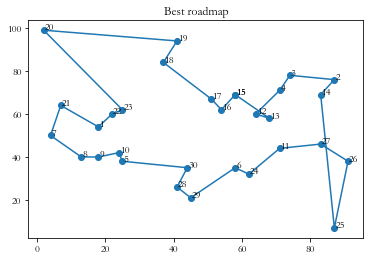

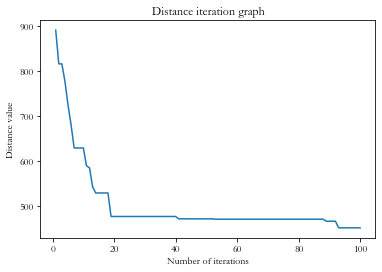

In [55]:
#蚁群算法解决TSP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import random
matplotlib.rcParams['font.family'] = 'STSong'#设置绘图中使用的字体

city_name = np.arange(0, 30, 1, dtype=int)#设置城市名称
filename = 'city30.txt'#读取文件
city_condition = np.loadtxt(filename, dtype=np.int32, delimiter=',').reshape((30, 2))#将文件里的城市坐标转化为30x2的矩阵

#Distance距离矩阵
city_count = len(city_name)
Distance = np.zeros((city_count, city_count))#定义存放城市间距离的矩阵
for i in range(city_count):
    for j in range(city_count):
        if i != j:
            Distance[i][j] = math.sqrt((city_condition[i][0] - city_condition[j][0]) ** 2 + (city_condition[i][1] - city_condition[j][1]) ** 2)
        else:
            Distance[i][j] = 100000#自己到自己的距离设置为很大

# 蚂蚁数量
AntCount = 20
# 城市数量
city_count = len(city_name)
# 信息素
alpha = 1  # 信息素重要程度因子
beta = 1  # 启发函数重要程度因子
rho = 0.3 #信息挥发系数
iter = 0  # 迭代初始值
MAX_iter = 100  # 最大迭代值
Q = 100
# 初始信息素矩阵，全是为1组成的矩阵
pheromonetable = np.ones((city_count, city_count))

# 候选集列表,存放蚂蚁的路径(一只蚂蚁一个路径),一共就Antcount个路径，一共是蚂蚁数量*30个城市数量
candidate = np.zeros((AntCount, city_count)).astype(int) 

# path_best存放的是相应的，每次迭代后的最优路径，每次迭代只有一个值
path_best = np.zeros((MAX_iter, city_count),dtype=int) 

# 存放每次迭代的最优距离
distance_best = np.zeros( MAX_iter)
# 倒数矩阵
etable = 1.0 / Distance  

while iter <  MAX_iter:
    # first：蚂蚁初始点选择
    if AntCount <= city_count:
    #np.random.permutation随机排列一个数组的
        candidate[:, 0] = np.random.permutation(range(city_count))[:AntCount]
    else:
        m =AntCount -city_count
        n =2
        candidate[:city_count, 0] = np.random.permutation(range(city_count))[:]
        while m >city_count:
            candidate[city_count*(n -1):city_count*n, 0] = np.random.permutation(range(city_count))[:]
            m = m -city_count
            n = n + 1
        candidate[city_count*(n-1):AntCount,0] = np.random.permutation(range(city_count))[:m]
    length = np.zeros(AntCount)#每次迭代的N个蚂蚁的距离值

    # second：选择下一个城市选择
    for i in range(AntCount):
        # 移除已经访问的第一个元素
        unvisit = list(range(city_count))  # 列表形式存储没有访问的城市编号
        visit = candidate[i, 0]  # 当前所在点,第i个蚂蚁在第一个城市
        unvisit.remove(visit)  # 在未访问的城市中移除当前开始的点
        for j in range(1, city_count):#访问剩下的city_count个城市，city_count次访问
            protrans = np.zeros(len(unvisit))#每次循环都更改当前没有访问的城市的转移概率矩阵1*30,1*29,1*28...
            # 下一城市的概率函数
            for k in range(len(unvisit)):
                # 计算当前城市到剩余城市的（信息素浓度^alpha）*（城市适应度的倒数）^beta
                # etable[visit][unvisit[k]],(alpha+1)是倒数分之一，pheromonetable[visit][unvisit[k]]是从本城市到k城市的信息素
                protrans[k] = np.power(pheromonetable[visit][unvisit[k]], alpha) * np.power(
                    etable[visit][unvisit[k]], beta)

            # 累计概率，轮盘赌选择
            cumsumprobtrans = (protrans / sum(protrans)).cumsum()
            cumsumprobtrans -= np.random.rand()
            # 求出离随机数产生最近的索引值
            k = unvisit[list(cumsumprobtrans > 0).index(True)]
            # 下一个访问城市的索引值
            candidate[i, j] = k
            unvisit.remove(k)
            length[i] += Distance[visit][k]
            visit = k  # 更改出发点，继续选择下一个到达点
        length[i] += Distance[visit][candidate[i, 0]]#最后一个城市和第一个城市的距离值也要加进去

    """
    更新路径等参数
    """
    # 如果迭代次数为一次，那么无条件让初始值代替path_best,distance_best.
    if iter == 0:
        distance_best[iter] = length.min()
        path_best[iter] = candidate[length.argmin()].copy()
    else:
        # 如果当前的解没有之前的解好，那么当前最优还是为之前的那个值；并且用前一个路径替换为当前的最优路径
        if length.min() > distance_best[iter - 1]:
            distance_best[iter] = distance_best[iter - 1]
            path_best[iter] = path_best[iter - 1].copy()
        else:  # 当前解比之前的要好，替换当前解和路径
            distance_best[iter] = length.min()
            path_best[iter] = candidate[length.argmin()].copy()

    """
        信息素的更新
    """
    #信息素的增加量矩阵
    changepheromonetable = np.zeros((city_count, city_count))
    for i in range(AntCount):
        for j in range(city_count - 1):
            # 当前路径比如城市23之间的信息素的增量：1/当前蚂蚁行走的总距离的信息素
            
            changepheromonetable[candidate[i, j]][candidate[i,j + 1]] += Q / length[i]
            #Distance[candidate[i, j]][candidate[i, j + 1]]
        #最后一个城市和第一个城市的信息素增加量
        changepheromonetable[candidate[i, j + 1]][candidate[i, 0]] += Q / length[i]
    for i in range(city_count- 1):#加入精英策略
        changepheromonetable[path_best[iter,i]][path_best[iter,i+1]] += 50 / distance_best[iter]#为最优路径添加信息素
    #信息素更新的公式：
    pheromonetable = (1 - rho) * pheromonetable + changepheromonetable
    
    iter += 1
    
print("蚂蚁数量",AntCount,"信息挥发系数",rho,"信息素因子",alpha,"启发因子",beta)
print("蚁群算法的最优路径",path_best[-1]+1)
print("迭代", MAX_iter,"次后","蚁群算法求得最优解",distance_best[-1])

# 路线图绘制
fig = plt.figure()
plt.title("Best roadmap")
x = []
y = []
path = []
for i in range(len(path_best[-1])):
    x.append(city_condition[int(path_best[-1][i])][0])
    y.append(city_condition[int(path_best[-1][i])][1])
    path.append(int(path_best[-1][i])+1)
x.append(x[0])
y.append(y[0])
path.append(path[0])
for i in range(len(x)):
    plt.annotate(path[i], xy=(x[i], y[i]), xytext=(x[i] + 0.3, y[i] + 0.3))
plt.plot(x, y,'-o')

# 距离迭代图
fig = plt.figure()
#plt.figure语()---在plt中绘制一张图片
plt.title("Distance iteration graph")#距离迭代图
plt.plot(range(1, len(distance_best) + 1), distance_best)
plt.xlabel("Number of iterations")#迭代次数
plt.ylabel("Distance value")#距离值
plt.show()